# Kodeveiledning

Denne notebooken gir en veiledning i ulike funksjoner `poetry_analysis` tilbyr, og en fremgangsmåte for å bruke dem på større tekstmaterialer

## Tekstdata

De fleste funksjonene, som henter informasjon direkte fra teksten, fungerer på strofe- eller linjenivå. Disse tar ofte et rent tekstobjekt, eller en liste med `string`-objekter som argument.

Vi kan starte med den første strofen av diktet "At jeg, at jeg har kjærligheden mødt." av Karen Nilsen, fra [*Kvinders sange* (1895)](https://www.nb.no/items/URN:NBN:no-nb_digibok_2012030706060) som eksempel, og deler teksten inn i linjer:  

In [1]:
text = """At jeg, at jeg har kjærligheden mødt!
Det er, som alt, som alt paany er født!
Et under er der i mit liv nu skeet,
Et under, kjærligheden, har jeg seet!
"""

textlines = text.splitlines()

## Lyriske trekk: gjentakelsesmønstre

### Enderim

Vi ser at enderimsmønsteret i teksten vår er `AABB`. 

> Legg merke til at vi må skru på et flagg (`orthographic=True`) for å markere at verselinjene er tekst, og ikke fonemisk lydskrift.

In [2]:
from poetry_analysis.rhyme_detection import tag_rhyming_verses

end_rhymes = tag_rhyming_verses(textlines, orthographic=True)

end_rhymes

[Verse(id_=0, rhyme_score=0, rhyme_tag='a', text='At jeg, at jeg har kjærligheden mødt!', transcription='', tokens=['at', 'jeg', 'at', 'jeg', 'har', 'kjærligheden', 'mødt'], syllables=None, last_token='mødt', rhymes_with=None),
 Verse(id_=1, rhyme_score=1, rhyme_tag='a', text='Det er, som alt, som alt paany er født!', transcription='', tokens=['det', 'er', 'som', 'alt', 'som', 'alt', 'paany', 'er', 'født'], syllables=None, last_token='født', rhymes_with=0),
 Verse(id_=2, rhyme_score=0, rhyme_tag='b', text='Et under er der i mit liv nu skeet,', transcription='', tokens=['et', 'under', 'er', 'der', 'i', 'mit', 'liv', 'nu', 'skeet'], syllables=None, last_token='skeet', rhymes_with=None),
 Verse(id_=3, rhyme_score=1, rhyme_tag='b', text='Et under, kjærligheden, har jeg seet!', transcription='', tokens=['et', 'under', 'kjærligheden', 'har', 'jeg', 'seet'], syllables=None, last_token='seet', rhymes_with=2)]

Dersom tekstdata ligger i en `.txt`-fil, kan vi hoppe over linjesegmenteringen, og bruke `tag_poem_file()`. Funksjonen både returnerer og skriver utdata til en `.json`-fil når vi skrur på  `write_to_file`-flagget.

> **OBS:** Funksjonen antar at teksten i filen har to tomme linjer mellom hver strofe, dvs. tre  linjeskift etter siste vers i en strofe: `"\n\n\n"`


In [3]:
from pathlib import Path

from poetry_analysis.rhyme_detection import tag_poem_file

poem_file = "./example_poem.txt"
Path(poem_file).write_text(text)

result = tag_poem_file(poem_file, write_to_file=True)

result[0]

{'stanza_id': 0,
 'rhyme_scheme': 'aabb',
 'verses': [{'rhyme_score': 0,
   'rhyme_tag': 'a',
   'text': 'At jeg, at jeg har kjærligheden mødt!',
   'transcription': '',
   'tokens': ['at', 'jeg', 'at', 'jeg', 'har', 'kjærligheden', 'mødt'],
   'syllables': None,
   'last_token': 'mødt',
   'rhymes_with': None,
   'verse_id': 0},
  {'rhyme_score': 1,
   'rhyme_tag': 'a',
   'text': 'Det er, som alt, som alt paany er født!',
   'transcription': '',
   'tokens': ['det', 'er', 'som', 'alt', 'som', 'alt', 'paany', 'er', 'født'],
   'syllables': None,
   'last_token': 'født',
   'rhymes_with': 0,
   'verse_id': 1},
  {'rhyme_score': 0,
   'rhyme_tag': 'b',
   'text': 'Et under er der i mit liv nu skeet,',
   'transcription': '',
   'tokens': ['et', 'under', 'er', 'der', 'i', 'mit', 'liv', 'nu', 'skeet'],
   'syllables': None,
   'last_token': 'skeet',
   'rhymes_with': None,
   'verse_id': 2},
  {'rhyme_score': 1,
   'rhyme_tag': 'b',
   'text': 'Et under, kjærligheden, har jeg seet!',
   '

### Anaforer

Anaforer er definert som fraser i starten av en linje som gjentar seg enten på samme linje eller i umiddelbart påfølgende linjer.

Funksjonen `extract_anaphora` henter ut henholdsvis uni-, bi-, tri- og firegrammer fra påfølgende linjer

In [4]:
from poetry_analysis.anaphora import extract_anaphora

extract_anaphora(text)

{'1-grams': {'et': 2}, '2-grams': {'et under': 2}}

Funksjonen `extract_line_anaphora` henter ut fraser som gjentar seg på samme linje

In [5]:
from poetry_analysis.anaphora import extract_line_anaphora

extract_line_anaphora(text)

[{'line_id': 0, 'phrase': 'at jeg', 'count': 2},
 {'line_id': 2, 'phrase': 'et', 'count': 2},
 {'line_id': 3, 'phrase': 'et', 'count': 2}]

### Alliterasjon 

Alliterasjon er umiddelbart påfølgende ord som starter på samme konsonant.

Eksempeltekst er første side i langdiktet ["Sirius som Séer"](https://www.nb.no/items/URN:NBN:no-nb_digibok_2009010803031?page=3) av Gunhild Wexelsen (1891).


In [6]:
from poetry_analysis.alliteration import count_alliterations, fetch_alliteration_symbols, find_line_alliterations

text = """Stjerneklare Septembernat
Sees Sirius,
Sydhimlens smukkeste
Stjerne,
Solens skjønneste Søster,
Svæve saa stille,
Straale saa smukt,
Skue sørgmodigt
Slægternes Strid.
Sine samlede Syner
Sender Stjernen Sirius
Sine store Slægtninge:
Solen, Skorpionen,
Stolte, svømmende Svane,
Sydkorset, Saturn,
Som straalende Stjerneskud.
Sirius ser saameget!
Ser Sagas skyhøie Sæde,
‒ Store Skagastølstind ‒
Som sydfor Snehætten staar."""

result = find_line_alliterations(text)
alliteration_count = count_alliterations(result)
symbol = fetch_alliteration_symbols(result)

print(f"Fant {alliteration_count} ord som starter på '{symbol[0]}': ")
print(result)

Fant 52 ord som starter på 's': 
[['stjerneklare', 'septembernat', 'sees', 'sirius', 'sydhimlens', 'smukkeste', 'stjerne', 'solens', 'skjønneste', 'søster', 'svæve', 'saa', 'stille', 'straale', 'saa', 'smukt', 'skue', 'sørgmodigt', 'slægternes', 'strid', 'sine', 'samlede', 'syner', 'sender', 'stjernen', 'sirius', 'sine', 'store', 'slægtninge', 'solen', 'skorpionen', 'stolte', 'svømmende', 'svane', 'sydkorset', 'saturn', 'som', 'straalende', 'stjerneskud', 'sirius', 'ser', 'saameget', 'ser', 'sagas', 'skyhøie', 'sæde', 'store', 'skagastølstind', 'som', 'sydfor', 'snehætten', 'staar']]


### Lyrisk subjekt

Det lyriske subjektet kan komme frem på mange måter i et dikt, noen ganger mer eksplisitt enn andre. 

Funksjonen `detect_lyrical_subject` bruker ordlister med personlige pronomen og markerer hvorvidt et eksplisitt lyrisk subjekt ("jeg") eller objekt ("meg") forekommer i teksten, implisitt ("du", "vi", "dere") eller indirekte via sted-/tidsdeiksis ("her", "nå", "i morgen")

In [7]:
from poetry_analysis.lyrical_subject import detect_lyrical_subject

detect_lyrical_subject(text)

{'explicit_subject': True,
 'explicit_object': True,
 'implicit': True,
 'deixis': False}

## På tide å heve blikket! 

Vi kan jo lett se gjentakelsesmønstrene selv når vi ser på én tekst av gangen, men hva om du har tusenvis? 

Ta for eksempel korpuset [NORN Dikt](https://github.com/norn-uio/norn-poems) som har over 3000 korrekturleste dikt og kan lastes ned fra Github: 
- [norn_poems.jsonl](https://github.com/norn-uio/norn-poems/blob/main/norn_poems.jsonl) 
- [metadata.jsonl](https://github.com/norn-uio/norn-poems/blob/main/metadata.jsonl)

In [8]:
import pandas as pd

# Last inn i en pandas dataramme
textdata = pd.read_json("norn_poems.jsonl", lines=True)
meta = pd.read_json("metadata.jsonl", lines=True)

df = meta.merge(textdata, on="poem_id")

Så kan vi bruke funksjonen `tag_text` på datarammen: 

In [9]:
from poetry_analysis.rhyme_detection import tag_text

df["end_rhymes"] = df.text.apply(lambda t: list(tag_text(t)))

Resultatet er et nøstet hierarki av strofer og linjer og annotasjoner som hører til, så vi flater det ut med god gammeldags iterasjon over radene og `pandas.json_normalize`: 

In [ ]:
all_records = []

for _, row in df.iterrows():
    # Normaliser annotasjonsstrukturen for hver rad
    normalized = pd.json_normalize(
        row["end_rhymes"],
        record_path="verses",
        meta=["stanza_id", "rhyme_scheme"],
    )
    # Legg til dikt-ID så vi beholder koblingen til metadata
    normalized["poem_id"] = row["poem_id"]
    all_records.append(normalized)

# Slå sammen alle radene
expanded = pd.concat(all_records, ignore_index=True)

/tmp/ipykernel_92287/602871409.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  expanded = pd.concat(all_records, ignore_index=True)


## Litt statistikk: hvordan ser dataene ut? 

In [11]:
n_authors = df.author_name.nunique()
n_books = df.txt_dirname.nunique()  # Unike IDer for publikasjoner
n_poems = df.poem_id.nunique()

# Antall strofer
stanza_count = (
    expanded.groupby(["poem_id", "stanza_id"])
    .count()
    .reset_index()
    .groupby("poem_id")
    .agg(n_stanzas=("stanza_id", "count"))
    .reset_index()
)
n_stanzas = int(stanza_count.n_stanzas.sum())


# Antall linjer
n_lines = len(expanded)


# Antall ord i materialet:
n_words = expanded.tokens.apply(len).sum()
n_types = expanded.tokens.explode().nunique()


print("Det er ")
print(f"- {n_books} bøker og ")
print(f"- {n_poems} dikt i dette korpusutvalget, ")
print(f"- skrevet av {n_authors} forfattere.")

print("Tilsammen består datamaterialet av")
print(f"- {n_stanzas} strofer, ")
print(f"- {n_lines} verselinjer, ")
print(f"- {n_words} ord (tokens), og")
print(f"- {n_types} unike ordformer (typer).")

Det er 
- 74 bøker og 
- 3117 dikt i dette korpusutvalget, 
- skrevet av 57 forfattere.
Tilsammen består datamaterialet av
- 18792 strofer, 
- 111700 verselinjer, 
- 624688 ord (tokens), og
- 51034 unike ordformer (typer).


## De vanligste anaforene

In [12]:
from poetry_analysis.anaphora import construct_anaphora_df

anaphora_df = construct_anaphora_df(expanded, anaphora_length=3)

In [13]:
anaphora_df.phrase.value_counts()

phrase
og det er         20
golgathamanden    10
kom og hjælp      10
jeg ser paa        9
syng meg um        8
                  ..
fagre ord som      2
tid som har        2
af alt som         2
til dig som        2
det var saa        2
Name: count, Length: 340, dtype: int64

# Topp 10 rimskjema

,stanza_rhyme,count
0,abcb,2222
1,abab,2021
2,aabb,1256
3,abcd,1034
4,aa,509
5,abac,465
6,ababcdcd,465
7,ab,393
8,a,360
9,aabc,331


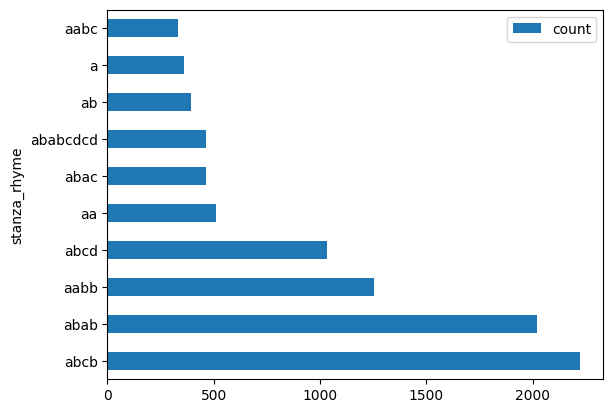

In [14]:
rhyme_group = expanded.groupby(["poem_id", "stanza_id"]).agg(stanza_rhyme=("rhyme_tag", "sum"))
rhyme_count = rhyme_group.value_counts().to_frame().reset_index()
common_rhyme_schemes = rhyme_count.head(10)
common_rhyme_schemes.plot(x="stanza_rhyme", y="count", kind="barh")
common_rhyme_schemes